# Machine Learning with Python

# Iris dataset

In [259]:
import sklearn as sk
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Load iris dataset and explore it

![](Figures/iris.jpg)

In [256]:
iris = datasets.load_iris()

In [257]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

![](Figures/Petal-sepal.jpg)

In [252]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [181]:
iris.data.__class__

numpy.ndarray

In [182]:
iris.target.__class__

numpy.ndarray

In [183]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [184]:
values, counts = np.unique(iris.target, return_counts=True)
[values, counts]

[array([0, 1, 2]), array([50, 50, 50])]

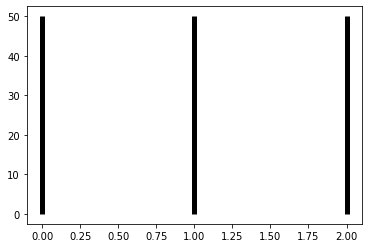

In [185]:
plt.vlines(values, 0, counts, lw = 5)

### Split iris dataset

Setup **X** and **Y** matrices

In [186]:
X = iris.data
y = iris.target

### PCA 

In [187]:
from sklearn.decomposition import PCA

### Raw data

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd87ad37250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd87ad37910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd87ad29ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd87ad37fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd87ad42310>,
 'means': []}

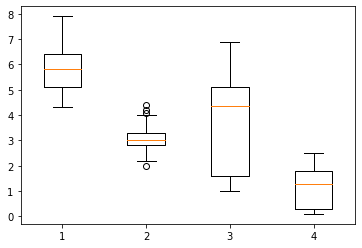

In [188]:
plt.boxplot(X)

In [189]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [190]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [191]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [192]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

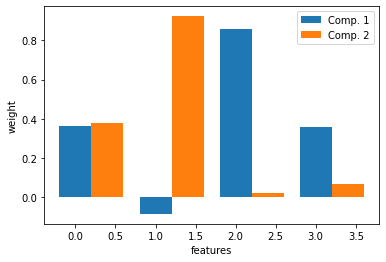

In [245]:
bar_width = 0.4
fig, ax = plt.subplots()
ax.bar(x, pca.components_[0], width = bar_width, label = "Comp. 1")
ax.bar(x+bar_width, pcaSc.components_[1], width = bar_width, label = "Comp. 2")

ax.set_xlabel("features")
ax.set_ylabel("weight")
ax.legend()

Project data in a 2 dimensional space

In [193]:
X_pca = pca.transform(X)

Visualize the **PCA** model

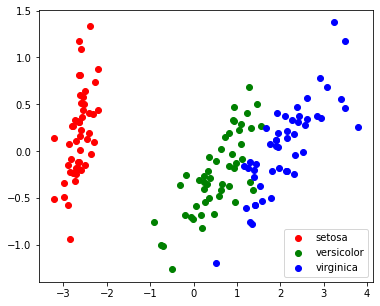

In [194]:
target_ids = range(len(iris.target_names))

plt.figure(figsize = (6, 5))
for i, col, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c = col, label=label)
plt.legend()
plt.show()

### Scaled data

In [195]:
Xsc = sk.preprocessing.scale(X)
Xsc[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [196]:
for i in range(0, Xsc.shape[1]):
    print(np.mean(Xsc[:, i]))

-1.4684549872375404e-15
-1.8237263551175904e-15
-1.6105635343895603e-15
-9.473903143468002e-16


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd87b02b340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd87b02ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd87b01ffa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd87b035100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd87b035400>,
 'means': []}

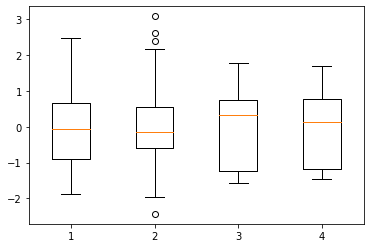

In [197]:
plt.boxplot(Xsc)

In [198]:
pcaSc = PCA(n_components = 2)
pcaSc.fit(Xsc)
pcaSc.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [207]:
pcaSc.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

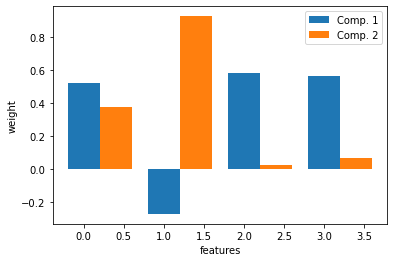

In [246]:
bar_width = 0.4
fig, ax = plt.subplots()
ax.bar(x, pcaSc.components_[0], width = bar_width, label = "Comp. 1")
ax.bar(x+bar_width, pcaSc.components_[1], width = bar_width, label = "Comp. 2")

ax.set_xlabel("features")
ax.set_ylabel("weight")
ax.legend()

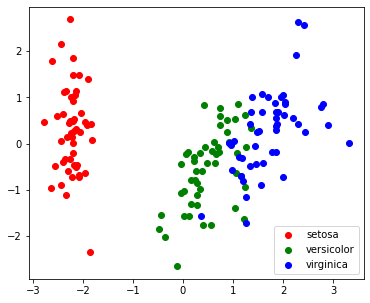

In [248]:
Xsc_pca = pcaSc.transform(Xsc)

plt.figure(figsize = (6, 5))
for i, col, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(Xsc_pca[y == i, 0], Xsc_pca[y == i, 1],
               c = col, label=label)
plt.legend()
plt.show()

# ML predictors steps

Main steps

- Select features and examples

- Choose a metric

- Choose a model and optimization algorithm

- Evaluate performance of the model

- Tuning the algorithm

# Predictors examples

## Training a perceptron

![Perceptron](Figures/perceptron.png)

Model to learn 
$$
Y = f(\sum_{i=0}w_i x_i)
$$

In [213]:
X = iris.data[:, [0, 1]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Split the dataset 70% training and 30% test data

In [171]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=0)

In [172]:
X_train[:10]

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8]])

In [173]:
X_test[:10]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3]])

In [217]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [218]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

Before training, we must standarize the features 
$$
\hat{x} = \frac{x-\bar{x}}{sd(x)}
$$

In [219]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [220]:
X_test_std

array([[-0.10694994, -0.55721505],
       [ 0.1222285 , -1.92315077],
       [-0.45071761,  2.6299683 ],
       [ 1.6118884 , -0.32955909],
       [-1.02366372,  0.80872067],
       [ 0.46599617,  0.58106472],
       [-1.02366372,  1.03637663],
       [ 0.92435306,  0.12575281],
       [ 1.03894229, -0.55721505],
       [ 0.23681773, -0.55721505],
       [ 0.23681773, -1.01252695],
       [ 0.5805854 ,  0.35340877],
       [ 0.23681773, -0.55721505],
       [ 0.69517462, -0.55721505],
       [ 0.23681773, -0.32955909],
       [-1.13825295,  1.26403258],
       [ 0.1222285 , -0.32955909],
       [-0.45071761, -1.01252695],
       [-1.25284217, -0.10190314],
       [-0.56530683,  1.94700044],
       [-0.33612839, -0.55721505],
       [-0.33612839, -0.10190314],
       [-1.25284217,  0.80872067],
       [-1.71119906, -0.32955909],
       [ 0.35140695, -0.55721505],
       [-1.48202061,  1.26403258],
       [-0.9090745 ,  1.71934449],
       [ 0.35140695, -0.32955909],
       [-1.02366372,

## Training a perceptron

In [221]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 =  0.2, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.2,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [222]:
y_test.shape


(45,)

In [223]:
y_pred_train = ppn.predict(X_train_std)
print('Misclassified samples: %d' % (y_train != y_pred_train).sum())

Misclassified samples: 26


How many times our model missclassify a sample?

In [224]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 18


Accuracy?

In [225]:
from sklearn.metrics import accuracy_score

print('Test accuracy: %.2f' % accuracy_score(y_test, y_pred))

Test accuracy: 0.60


Function to visulize the decision boundary, i.e. the **model**

In [226]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c = '',
                    alpha = 1.0,
                    edgecolor = 'black',
                    linewidths = 1,
                    marker = 'o',
                    s = 55, label = 'test set')

Gather train and test datasets all together

In [227]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Plot the dataset and the decission boundary

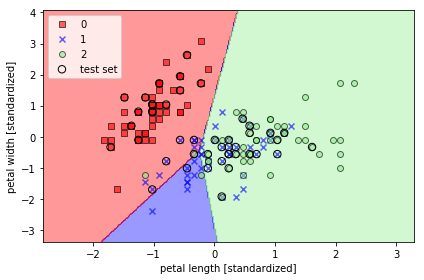

In [228]:
plot_decision_regions(X = X_combined_std, y = y_combined,
                      classifier = ppn, test_idx = range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

## Training a KNN predictor

KNN is very simple and straightforward. You must define the following steps:

- Choose the number _K_ and a distance metric

- Find the _K-nearest_ neighbours of a sample

- Assign the class by majority vote

![](Figures/knn.png)
    

In [229]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 1, metric = 'minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

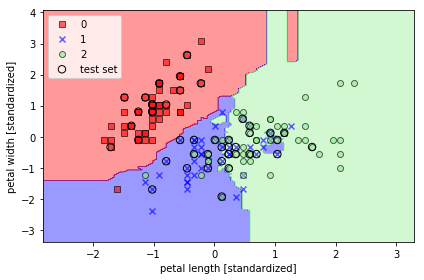

In [230]:
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

KNN has used the Euclideaan distance, $p=2$. You can test KNN with other distances by setting the $p$ in the Minkowski distance 

$$
d(x^{(i)},x^{(j)})= \sqrt[p]{\sum_{k} | x^{(i)}_k - x^{(j)}_k) |^p}
$$